# IMDb Sentiment Classification Using a Neural Network

## Objective
Train a neural network to classify movie reviews from the IMDb dataset as either positive or negative.

## Tools and Libraries
- Python
- Pandas
- Matplotlib & Seaborn
- NLTK
- Scikit-learn
- TensorFlow/Keras

In [1]:
# Ignore warnings 
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading and Exploration

In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\braid\Downloads\IMDB Dataset.csv")
print(df.info())
print(df['sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


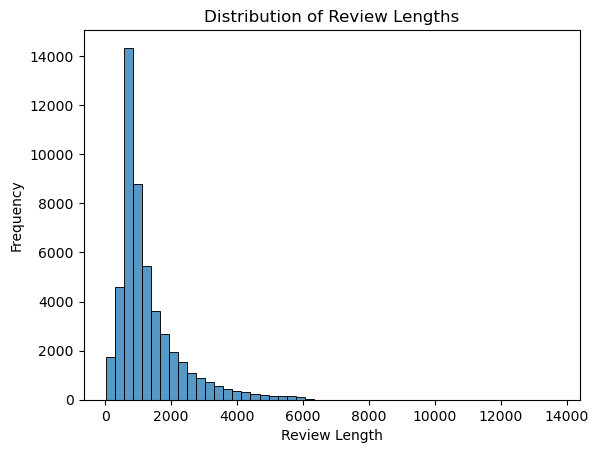

In [7]:
df['review_length'] = df['review'].apply(len)

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


## 2. Data Preprocessing

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    tokens = re.findall(r'\b\w+\b', text)
    filtered = [word for word in tokens if word not in stop_words]
    return " ".join(filtered)

df['cleaned_review'] = df['review'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\braid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


## 3. Model Building

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=5000))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## 4. Model Training

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7387 - loss: 0.5922 - val_accuracy: 0.8888 - val_loss: 0.2726
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9107 - loss: 0.2290 - val_accuracy: 0.8826 - val_loss: 0.2814
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9292 - loss: 0.1885 - val_accuracy: 0.8749 - val_loss: 0.2991
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9394 - loss: 0.1697 - val_accuracy: 0.8737 - val_loss: 0.3195
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9429 - loss: 0.1579 - val_accuracy: 0.8675 - val_loss: 0.3398
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9494 - loss: 0.1473 - val_accuracy: 0.8679 - val_loss: 0.3561
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9601 - loss: 0.1256 - val_accuracy: 0.8633 - val_loss: 0.3782
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9703 - loss: 0.1022 - val_accuracy: 0.8619 - v

## 5. Evaluation

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}, Test Loss: {loss:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.4428
Test Accuracy: 0.8637, Test Loss: 0.4498


#### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)

print(f"Logistic Regression Accuracy: {log_acc:.4f}")


Logistic Regression Accuracy: 0.8915


#### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

print(f"Random Forest Accuracy: {rf_acc:.4f}")


Random Forest Accuracy: 0.8536


## 6. Visualization

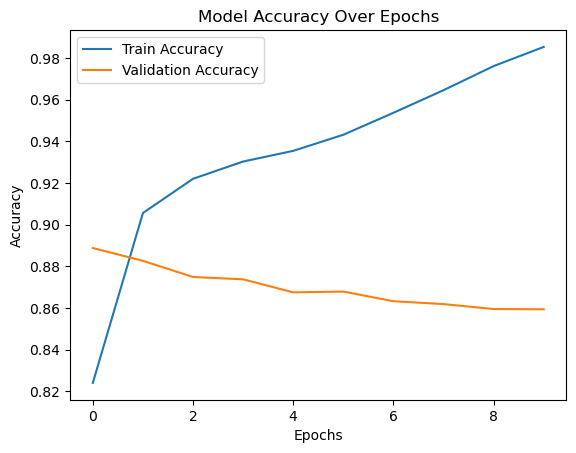

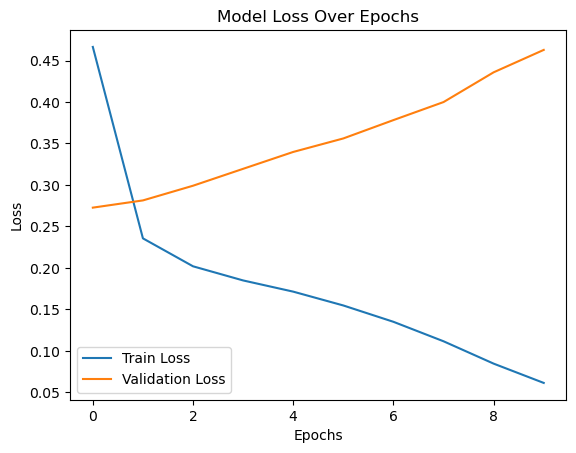

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
